In [9]:

from simulator.reporters import TransitionReporter
from simulator.reporters.utilization_reporter import UtilizationReporter
from simulator.core import Task
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
from simulator import Config

In [29]:
def getTupleTemplate(batchId: str):
    reportMap = None
    with open(
        "results/reportMaps/reportMap{id}.json".format(id = batchId),
        "r") as reportFile:
        reportMap = json.load(reportFile)
    
    # Finding all config changes
    configList = set()
    for report in reportMap:
        varients = report["varient"]
        for varient in varients:
            configList.add(varient["config"])
            
    tupleTemplate = {}
    for config in configList:
        tupleTemplate[config] = Config.get(config)
        tupleTemplate[config + "_default"] = True
    return tupleTemplate  

def loadDataframe(batchId: str) -> pd.DataFrame:
    reportMap = None
    with open(
        "results/reportMaps/reportMap{id}.json".format(id = batchId),
        "r") as reportFile:
        reportMap = json.load(reportFile)

    tupleTemplate = getTupleTemplate(batchId)
    tupleList = []
    for report in reportMap:
        reportTupleTemplate = tupleTemplate.copy()
        runId = report["runId"]
        varients = report["varient"]
        for varient in varients:
            config = varient["config"]
            reportTupleTemplate[config] = varient["value"]
            reportTupleTemplate[config + "_default"] = False
        reportTupleTemplate["run_id"] = runId
        
        mobileReport = TransitionReporter.getListFromPickle("results/report/{batchId}/reportmobile{runId}.pkl".format(batchId = batchId, runId = runId))
        for item in mobileReport:
            tuple = reportTupleTemplate.copy()
            tuple["task_id"] = item.task.id()
            tuple["arrival_time"] = item.task.arrivalTime()
            tuple["delay"] = item.delay
            tuple["power"] = item.powerConsumtion
            tuple["reward"] = item.reward
            tuple["action"] = item.action
            tuple["hopLimit"] = item.task.hopLimit()
            tupleList.append(tuple)
            
    df = pd.DataFrame(tupleList)
    # unify action values
    df["action"] = df["action"].apply(lambda x: 0 if ("0" in str(x)) else (1 if ("1" in str(x)) else x))
    
    return df

def loadUtilDataframe(batchId: str) -> pd.DataFrame:
    reportMap = None
    with open(
        "results/reportMaps/reportMap{id}.json".format(id = batchId),
        "r") as reportFile:
        reportMap = json.load(reportFile)

    tupleTemplate = getTupleTemplate(batchId)
    tupleList = []
    for report in reportMap:
        reportTupleTemplate = tupleTemplate.copy()
        runId = report["runId"]
        varients = report["varient"]
        for varient in varients:
            config = varient["config"]
            reportTupleTemplate[config] = varient["value"]
            reportTupleTemplate[config + "_default"] = False
        reportTupleTemplate["run_id"] = runId
        
        utilMobileReport = UtilizationReporter.getListFromPickle("results/report/{batchId}/reportmobile-util-{runId}.pkl".format(batchId = batchId, runId = runId))
        
        for item in utilMobileReport:
            tuple = reportTupleTemplate.copy()
            tuple["task_id"] = item.task.id()
            tuple["environment"] = "mobile"
            tuple["run_time"] = item.runTime
            tuple["run_start"] = item.runStart
            tupleList.append(tuple)
        
        utilEdgeReport = UtilizationReporter.getListFromPickle("results/report/{batchId}/reportedge-util-{runId}.pkl".format(batchId = batchId, runId = runId))
        for item in utilEdgeReport:
            tuple = reportTupleTemplate.copy()
            tuple["task_id"] = item.task.id()
            tuple["environment"] = "edge"
            tuple["run_time"] = item.runTime
            tuple["run_start"] = item.runStart
            tupleList.append(tuple)   
        
    df = pd.DataFrame(tupleList)
    
    return df

In [38]:
batchId = "B6"
df = loadDataframe(batchId)
dfUtil = loadUtilDataframe(batchId)

In [39]:
dfUtil

,task_generator_lambda,task_generator_lambda_default,boxworld_centered_mobile_nodes,boxworld_centered_mobile_nodes_default,edge_selector,edge_selector_default,boxworld_mobile_nodes,boxworld_mobile_nodes_default,mobile_selector,mobile_selector_default,run_id,task_id,environment,run_time,run_start
0,0.5,False,True,False,dql_shared,False,50,False,dql_shared,False,0x97f468063490884,707,mobile,2.751574,0.050342
1,0.5,False,True,False,dql_shared,False,50,False,dql_shared,False,0x97f468063490884,708,mobile,2.058189,0.084953
2,0.5,False,True,False,dql_shared,False,50,False,dql_shared,False,0x97f468063490884,709,mobile,2.751574,0.105016
3,0.5,False,True,False,dql_shared,False,50,False,dql_shared,False,0x97f468063490884,710,mobile,1.331895,0.106744
4,0.5,False,True,False,dql_shared,False,50,False,dql_shared,False,0x97f468063490884,711,mobile,2.943134,0.121027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7469,0.5,False,True,False,dql_shared,False,50,False,dql_shared,False,0x97f468063490884,8692,edge,0.572291,302.703017
7470,0.5,False,True,False,dql_shared,False,50,False,dql_shared,False,0x97f468063490884,8695,edge,0.266379,303.239100
7471,0.5,False,True,False,dql_shared,False,50,False,dql_shared,False,0x97f468063490884,8684,edge,0.390732,303.465688
7472,0.5,False,True,False,dql_shared,False,50,False,dql_shared,False,0x97f468063490884,8697,edge,0.529295,303.534338


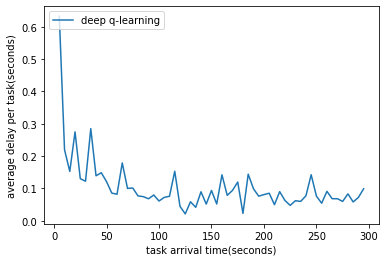

In [46]:
vairable_conditions = {
    "deep q-learning": (dfUtil["mobile_selector"] == "dql_shared") & (dfUtil["edge_selector"] == "dql_shared")
}
vairable_conditions1 = {
    "50": (df["boxworld_mobile_nodes"] == 50) & (df["mobile_selector"] == "dql") & (df["edge_selector"] == "dql"),
    "100": (df["boxworld_mobile_nodes"] == 100) & (df["mobile_selector"] == "dql") & (df["edge_selector"] == "dql"),
    "150": (df["boxworld_mobile_nodes"] == 150) & (df["mobile_selector"] == "dql") & (df["edge_selector"] == "dql"),
    "200": (df["boxworld_mobile_nodes"] == 200) & (df["mobile_selector"] == "dql") & (df["edge_selector"] == "dql"),
    "300": (df["boxworld_mobile_nodes"] == 300) & (df["mobile_selector"] == "dql") & (df["edge_selector"] == "dql"),
    "400": (df["boxworld_mobile_nodes"] == 400) & (df["mobile_selector"] == "dql") & (df["edge_selector"] == "dql")
}
vairable_conditions2 = {
    "50": (df["boxworld_mobile_nodes"] == 50) & (df["mobile_selector"] == "greedy") & (df["edge_selector"] == "greedy"),
    "100": (df["boxworld_mobile_nodes"] == 100) & (df["mobile_selector"] == "greedy") & (df["edge_selector"] == "greedy"),
    "150": (df["boxworld_mobile_nodes"] == 150) & (df["mobile_selector"] == "greedy") & (df["edge_selector"] == "greedy"),
    "200": (df["boxworld_mobile_nodes"] == 200) & (df["mobile_selector"] == "greedy") & (df["edge_selector"] == "greedy"),
    "300": (df["boxworld_mobile_nodes"] == 300) & (df["mobile_selector"] == "greedy") & (df["edge_selector"] == "greedy"),
    "400": (df["boxworld_mobile_nodes"] == 400) & (df["mobile_selector"] == "greedy") & (df["edge_selector"] == "greedy")
}
nc = 100
y = 0.5
c = False
vairable_conditions3 = {
    "greedy": (df["boxworld_mobile_nodes"] == nc) & (df["mobile_selector"] == "greedy") & (df["edge_selector"] == "greedy") & 
    (df["task_generator_lambda"] == y) & (df["boxworld_centered_mobile_nodes"] == c),
    "dql": (df["boxworld_mobile_nodes"] == nc) & (df["mobile_selector"] == "dql_remote") & (df["edge_selector"] == "dql_remote") & 
    (df["task_generator_lambda"] == y) & (df["boxworld_centered_mobile_nodes"] == c),
    "dql-local": (df["boxworld_mobile_nodes"] == nc) & (df["mobile_selector"] == "dql_local") & (df["edge_selector"] == "dql_local") & 
    (df["task_generator_lambda"] == y) & (df["boxworld_centered_mobile_nodes"] == c)
}
graphs = {}
for key, value in vairable_conditions.items():
    item_condition = value & (dfUtil["environment"] == "mobile")
    data = dfUtil.loc[item_condition, ["run_time"]].groupby(
        pd.cut(dfUtil["run_start"], np.arange(0, 300, 5))).sum() / (50 * 5 * 1)
    data.index = pd.IntervalIndex(data.index.get_level_values('run_start')).right
    graphs[key] = data

for key, data in graphs.items():
    plt.plot(data)

plt.ylabel('average delay per task(seconds)')
plt.xlabel('task arrival time(seconds)')
plt.legend(graphs.keys(), loc='upper left')